[View in Colaboratory](https://colab.research.google.com/github/TomasBombadillo/CrowEmotion/blob/master/CrowEmotion.ipynb)

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [3]:
from wider import WIDER
import matplotlib.pyplot as plt
import cv2

ModuleNotFoundError: ignored

# Fer2013 - Emotion Dataset

In [0]:
path = "/content/gdrive/My Drive/Project/fer2013/"

fer2013 = pd.read_csv(path+"fer2013.csv", sep=',')

In [0]:
data_train = fer2013.groupby(['Usage']).get_group('Training')
data_privatetest = fer2013.groupby(['Usage']).get_group('PrivateTest')
data_publictest = fer2013.groupby(['Usage']).get_group('PublicTest')

In [0]:
lenght_train = len(data_train)

In [0]:
images_train = np.zeros((lenght_train,48,48))
emotion_train = np.zeros(lenght_train)

for i in range(lenght_train):
  images_train[i] = np.array(data_train.iloc[i,1].split()).astype(int).reshape(48,48)
  emotion_train[i] = data_train.iloc[i,0]

emotion_train = np.int16(emotion_train)

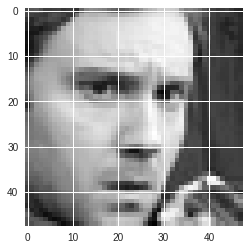

In [25]:
plt.imshow(images_train[0],cmap='gray')
plt.show()

In [26]:
emotion_train[0]

0

* Image size = 48x48
* categories :

  - 0=Angry,
  - 1=Disgust
  - 2=Fear
  - 3=Happy
  - 4=Sad
  - 5=Surprise
  - 6=Neutral
 
* Usage:
  - Training
  - PublicTest
  - PrivateTest

In [0]:
width = 48
height = 48

n_classes = 7

# IMBd Gender Dataset

# model 1 (Sequential fully-CNN)

In [0]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(None, width, height, 1))
y = tf.placeholder(tf.float32, shape=(None, 7))



# model 2 (Xception)

In [0]:
def little_Xception_Module(input_layer, conv_size, regularizer):
  residual = tf.layers.conv2d(input_layer, conv_size, kernel_size=(1,1), strides = (2,2), padding='same', use_bias=False)
  residual = tf.layers.batch_normalization(residual)
  
  x = tf.layers.separable_conv2d(input_layer, conv_size, kernel_size=(3,3), padding='same', activity_regularizer=regularizer,use_bias=False)
  x = tf.nn.relu( tf.layers.batch_normalization(x) )
  x = tf.layers.separable_conv2d(x, conv_size, kernel_size=(3,3), padding='same', activity_regularizer=regularizer,use_bias=False)
  x = tf.layers.batch_normalization(x)
  x = tf.layers.max_pooling2d(x, pool_size=(3,3), strides = (2,2), padding='same')
  
  return tf.add( x,residual )

def little_Xception(input_layer):
  convolutions = [5,8,16,32,64]
  sizes =[3,1]
  strides = [1,2]
  
  regularizer = tf.contrib.layers.l2_regularizer(0.01)
  
  # first step
  x = tf.layers.conv2d(input_layer, convolutions[0], kernel_size=sizes[0], strides = strides[0], kernel_regularizer=regularizer,use_bias=False)
  x = tf.nn.relu( tf.layers.batch_normalization(x) )
  x = tf.layers.conv2d(x, convolutions[0], kernel_size=sizes[0], strides = strides[0], kernel_regularizer=regularizer,use_bias=False)
  x = tf.nn.relu( tf.layers.batch_normalization(x) )
  
  # REPLACE WITH little_Xception_Module(x,convolutions[1])
  
  # module 1
  residual = tf.layers.conv2d(x, convolutions[1], kernel_size=sizes[1], strides = strides[1], padding='same', use_bias=False)
  residual = tf.layers.batch_normalization(residual)
  
  x = tf.layers.separable_conv2d(x, convolutions[1], kernel_size=sizes[0], padding='same', kernel_regularizer=regularizer,use_bias=False)
  x = tf.nn.relu( tf.layers.batch_normalization(x) )
  x = tf.layers.separable_conv2d(x, convolutions[1], kernel_size=sizes[0], padding='same', kernel_regularizer=regularizer,use_bias=False)
  x = tf.layers.batch_normalization(x)
  x = tf.layers.max_pooling2d(x, pool_size=sizes[0], strides = strides[1], padding='same')
  
  x = tf.add( x,residual )
  
  # module 2
  residual = tf.layers.conv2d(x, convolutions[2], kernel_size=sizes[1], strides = strides[1], padding='same', use_bias=False)
  residual = tf.layers.batch_normalization(residual)
  
  x = tf.layers.separable_conv2d(x, convolutions[2], kernel_size=sizes[0], padding='same', kernel_regularizer=regularizer,use_bias=False)
  x = tf.nn.relu( tf.layers.batch_normalization(x) )
  x = tf.layers.separable_conv2d(x, convolutions[2], kernel_size=sizes[0], padding='same', kernel_regularizer=regularizer,use_bias=False)
  x = tf.layers.batch_normalization(x)
  x = tf.layers.max_pooling2d(x, pool_size=sizes[0], strides = strides[1], padding='same')
  
  x = tf.add( x,residual )
  
  # module 3
  residual = tf.layers.conv2d(x, convolutions[3], kernel_size=sizes[1], strides = strides[1], padding='same', use_bias=False)
  residual = tf.layers.batch_normalization(residual)
  
  x = tf.layers.separable_conv2d(x, convolutions[3], kernel_size=sizes[0], padding='same', kernel_regularizer=regularizer,use_bias=False)
  x = tf.nn.relu( tf.layers.batch_normalization(x) )
  x = tf.layers.separable_conv2d(x, convolutions[3], kernel_size=sizes[0], padding='same', kernel_regularizer=regularizer,use_bias=False)
  x = tf.layers.batch_normalization(x)
  x = tf.layers.max_pooling2d(x, pool_size=sizes[0], strides = strides[1], padding='same')
  
  x = tf.add( x,residual )
  
  # module 4
  residual = tf.layers.conv2d(x, convolutions[4], kernel_size=sizes[1], strides = strides[1], padding='same', use_bias=False)
  residual = tf.layers.batch_normalization(residual)
  
  x = tf.layers.separable_conv2d(x, convolutions[4], kernel_size=sizes[0], padding='same', kernel_regularizer=regularizer,use_bias=False)
  x = tf.nn.relu( tf.layers.batch_normalization(x) )
  x = tf.layers.separable_conv2d(x, convolutions[4], kernel_size=sizes[0], padding='same', kernel_regularizer=regularizer,use_bias=False)
  x = tf.layers.batch_normalization(x)
  x = tf.layers.max_pooling2d(x, pool_size=sizes[0], strides = strides[1], padding='same')
  
  x = tf.add( x,residual )
  
  # end
  x = tf.layers.conv2d(x, n_classes, kernel_size=sizes[0], strides = strides[0], padding='same')
  x = tf.reduce_mean(x, axis=[1,2])
  
  out = tf.nn.softmax(x, name='predictions')
  
  return out


In [0]:
convolutions = [5,8,16,32,64]
sizes =[3,1]
strides = [1,2]
  
regularizer = tf.contrib.layers.l2_regularizer(0.01)
  

tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(None, width, height, 1))
y = tf.placeholder(tf.float32, shape=(None, 7))

# Base
x = tf.layers.conv2d(X, convolutions[0], kernel_size=sizes[0], strides = strides[0], kernel_regularizer=regularizer,use_bias=False)
x = tf.nn.relu( tf.layers.batch_normalization(x) )
x = tf.layers.conv2d(x, convolutions[0], kernel_size=sizes[0], strides = strides[0], kernel_regularizer=regularizer,use_bias=False)
x = tf.nn.relu( tf.layers.batch_normalization(x) )

# Xception 1
x = little_Xception_Module(x,convolutions[1], regularizer)
# Xception 2
x = little_Xception_Module(x,convolutions[2], regularizer)
# Xception 3
x = little_Xception_Module(x,convolutions[3], regularizer)
# Xception 4
x = little_Xception_Module(x,convolutions[4], regularizer)

# End
x = tf.layers.conv2d(x, n_classes, kernel_size=sizes[0], strides = strides[0], padding='same')
x = tf.reduce_mean(x, axis=[1,2])
  
out = tf.nn.softmax(x, name='predictions')

# training operations
xentropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=x)
loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.001
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

correct = tf.equal(tf.argmax(y,1),tf.argmax(out,1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

# One hot
train_oh = tf.one_hot(emotion_train, n_classes)
#test_oh = tf.one_hot(y_test, n_class,axis=1)
'''
new_x_train = tf.random_shuffle(x_train,1)
new_y_train = tf.random_shuffle(train_oh,1)

new_x_test = tf.random_shuffle(x_test,1)
new_y_test = tf.random_shuffle(test_oh,1)
'''
init = tf.global_variables_initializer()

In [28]:
with tf.Session() as sess:
  init.run()
  y_training = train_oh.eval().reshape(-1,n_classes)
  
  print(y_training)
  
  print( out.eval(feed_dict={X:images_train[0].reshape(1,width,height,1), y:y_training[0].reshape(-1,n_classes)}) )

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
[[5.8743015e-05 3.7169875e-06 1.2457374e-03 1.7606466e-06 9.9729794e-01
  6.4347172e-05 1.3278270e-03]]
